In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv("cost_revenue_dirty.csv")

In [4]:
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [6]:
df.shape

(5391, 6)

In [8]:
df.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


In [22]:
df = df.drop(columns=['Rank', 'Release Date', 'Movie Title','Domestic Gross ($)'])
df

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


In [27]:
df =df.rename(columns={"Production Budget ($)": "production_budget_usd", "Worldwide Gross ($)": "worldwide_Gross_usd"})
df

,production_budget_usd,worldwide_Gross_usd
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


In [57]:
production_budget_usd_list = [int(i.replace("$","").replace(",","")) for i in df["production_budget_usd"]]
worldwide_Gross_usd_list  = [int(i.replace("$","").replace(",","")) for i in df["worldwide_Gross_usd"]]


In [61]:
list_ = []
for i in range(len(worldwide_Gross_usd_list)):
    item={
        "production_budget_usd":production_budget_usd_list[i],
        "worldwide_Gross_usd":worldwide_Gross_usd_list[i]
    }
    list_.append(item)

In [66]:
df = pd.DataFrame(list_)
df

,production_budget_usd,worldwide_Gross_usd
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [80]:
new_df = df[df["worldwide_Gross_usd"]>1]
new_df

,production_budget_usd,worldwide_Gross_usd
0,110000,11000000
2,200000,8000000
3,100000,3000000
4,245000,22000000
5,3900000,9000000
...,...,...
5378,55000000,376856949
5379,40000000,166893990
5380,185000000,561137727
5381,175000000,140012608


In [84]:
data = new_df
data.head()

,production_budget_usd,worldwide_Gross_usd
0,110000,11000000
2,200000,8000000
3,100000,3000000
4,245000,22000000
5,3900000,9000000


In [83]:
data.describe()

,production_budget_usd,worldwide_Gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


### Now our X is going to hold on to our production budgets 
### y is going to hold on to our revenue.

In [85]:
X = pd.DataFrame(data["production_budget_usd"])
y = pd.DataFrame(data["worldwide_Gross_usd"])

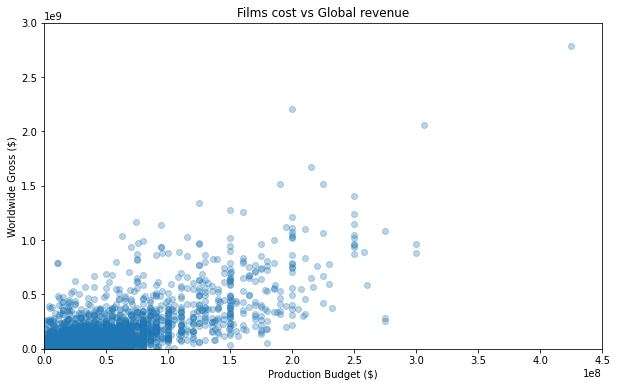

In [144]:
plt.figure(figsize = (10, 6))
plt.scatter(X, y, alpha=0.3)
plt.title("Films cost vs Global revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [156]:
regression = LinearRegression()
regression.fit(X.values,y.values)

LinearRegression()

#### Let's take a look at that slope coefficient.

It's 3.11.

It means that there is a positive relationship between budget and revenue and not only that, it means

that for each dollar that we spend on producing the movie, we should get around 3.1 dollars

in revenue in return.

In [166]:
regression.coef_ # slope coefficient.

array([[3.11150918]])

#### Now, what about the other parameter? The intercept.

This one is at -7.2 million.

How do we interpret that?

What this intercept is literally telling us is that a movie with a budget of zero would actually lose over 7 million dollars. So that's a bit problematic.

Right?

That seems quite unrealistic because if you and I went out to make a movie with a thousand dollars, it's

pretty unlikely that seven million would just disappear from our bank accounts.

So, this is a lot less realistic.

In [158]:
# intercept_
regression.intercept_

array([-7236192.72913963])

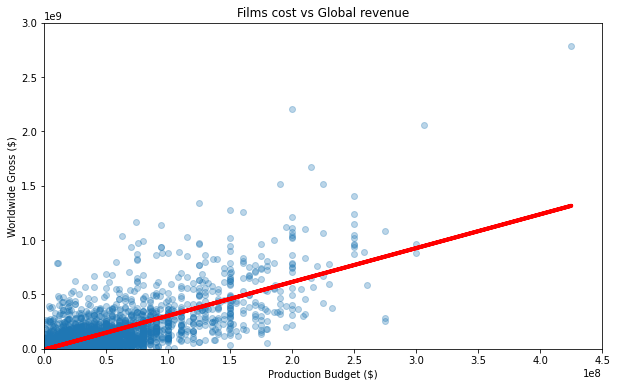

In [165]:
plt.figure(figsize = (10, 6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X.values, regression.predict(X.values), color="r", linewidth=4)

plt.title("Films cost vs Global revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

So even though it is very very simplistic we can still ask the question of how much of the real world data it actually explains. And for that we need some kind of measure.

We need some kind of statistic and the measure that we're going to look at is called **R squared**.

In [172]:
regression.score(X.values, y.values)
# that the R squared is approximately 0.55. >>> 55%

0.5496485356985729

For example how would our model do if we added more features, like how long it took to make or if it's

a sequel? Would we get more realism?

Would it make our model perform better and make our predictions more accurate?

And perhaps we should evaluate our model, not just on the data that we used for training it, but on new

data, data that it hasn't seen yet and also, what if the relationship that we have here is actually non-linear.
What if we somehow need to transform the data to get a better fit?

So in a way our analysis has left us with a lot more questions that we should investigate and we will

do just that in the upcoming modules.

In [173]:
import requests

cookies = {
    'cf_clearance': '3oBZsmarRMH28CxN_CfR6RGWiyh40UCyA2ovHcSfu2Q-1671216406-0-250',
    'EBEc81-PRFmCoYNYzbBn8w': '0',
    'zBylci_hRbmzLFmnNbf_dw': '0',
    'abtest:test': 'bar',
    'abtest:weekly_price_emphasis': 'weekly',
    '_gid': 'GA1.2.1990552209.1671216409',
    'haveShownExitIntent': 'yes',
    'haveShownEmailCapture': 'yes',
    'visit_history': '%5B%5B32046%2C%222022-12-16+18%3A56%3A37+%2B0000%22%5D%2C%5B32046%2C%222022-12-16+19%3A01%3A15+%2B0000%22%5D%5D',
    '_ga': 'GA1.2.1768958137.1671216409',
    '_gat_gtag_UA_75503228_3': '1',
    '__kla_id': 'eyIkcmVmZXJyZXIiOnsidHMiOjE2NzEyMTY0MTIsInZhbHVlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8/X19jZl9jaGxfdGs9S1pzWXFucnp5U1VzSGdyZjl6WmpkTjVEVFRaSThTQlVyODlYQzlzTHd5WS0xNjcxMjE2MzgzLTAtZ2FOeWNHek5CejAiLCJmaXJzdF9wYWdlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8ifSwiJGxhc3RfcmVmZXJyZXIiOnsidHMiOjE2NzEyMTcyNzYsInZhbHVlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8/X19jZl9jaGxfdGs9S1pzWXFucnp5U1VzSGdyZjl6WmpkTjVEVFRaSThTQlVyODlYQzlzTHd5WS0xNjcxMjE2MzgzLTAtZ2FOeWNHek5CejAiLCJmaXJzdF9wYWdlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8ifX0=',
    'pagevisits': '8',
    '_auto_social_share_session': 'slt2nshLp2Xawsehqc53PYK9Gxeg8JjxY2eK3w0WOyxj2UXXKMcTvl9if2mF2herGkUsCqiMsSMGYBuzh3D81I1inygFov0ySRFPJHnGUGx2gXtgwce5KK95qU00f3ZsSSpoOo3lW%2BPbqMMuHw3iAKRAon8xYMc53t7eTNibwOoZNHbcJkuNuqmZ019S4RT3nLWrV79DigOg%2BBZmPThBs0k3YheFuFW6wslsRjSGPWv3CWzwZw%3D%3D--UrWlcjYu9fZajnhQ--PGdOiSwy0s7zKL059xvK3w%3D%3D',
    '_ga_YJWQMGEX9Y': 'GS1.1.1671216410.1.1.1671217277.58.0.0',
    'sslastmodalopenlocation': 'https://www.starterstory.com/stories/young-pioneer-tours',
    'sslastmodalopenfeature': 'subscribe_page',
}

headers = {
    'authority': 'www.starterstory.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9,tr;q=0.8',
    'cache-control': 'max-age=0',
    # 'cookie': 'cf_clearance=3oBZsmarRMH28CxN_CfR6RGWiyh40UCyA2ovHcSfu2Q-1671216406-0-250; EBEc81-PRFmCoYNYzbBn8w=0; zBylci_hRbmzLFmnNbf_dw=0; abtest:test=bar; abtest:weekly_price_emphasis=weekly; _gid=GA1.2.1990552209.1671216409; haveShownExitIntent=yes; haveShownEmailCapture=yes; visit_history=%5B%5B32046%2C%222022-12-16+18%3A56%3A37+%2B0000%22%5D%2C%5B32046%2C%222022-12-16+19%3A01%3A15+%2B0000%22%5D%5D; _ga=GA1.2.1768958137.1671216409; _gat_gtag_UA_75503228_3=1; __kla_id=eyIkcmVmZXJyZXIiOnsidHMiOjE2NzEyMTY0MTIsInZhbHVlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8/X19jZl9jaGxfdGs9S1pzWXFucnp5U1VzSGdyZjl6WmpkTjVEVFRaSThTQlVyODlYQzlzTHd5WS0xNjcxMjE2MzgzLTAtZ2FOeWNHek5CejAiLCJmaXJzdF9wYWdlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8ifSwiJGxhc3RfcmVmZXJyZXIiOnsidHMiOjE2NzEyMTcyNzYsInZhbHVlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8/X19jZl9jaGxfdGs9S1pzWXFucnp5U1VzSGdyZjl6WmpkTjVEVFRaSThTQlVyODlYQzlzTHd5WS0xNjcxMjE2MzgzLTAtZ2FOeWNHek5CejAiLCJmaXJzdF9wYWdlIjoiaHR0cHM6Ly93d3cuc3RhcnRlcnN0b3J5LmNvbS8ifX0=; pagevisits=8; _auto_social_share_session=slt2nshLp2Xawsehqc53PYK9Gxeg8JjxY2eK3w0WOyxj2UXXKMcTvl9if2mF2herGkUsCqiMsSMGYBuzh3D81I1inygFov0ySRFPJHnGUGx2gXtgwce5KK95qU00f3ZsSSpoOo3lW%2BPbqMMuHw3iAKRAon8xYMc53t7eTNibwOoZNHbcJkuNuqmZ019S4RT3nLWrV79DigOg%2BBZmPThBs0k3YheFuFW6wslsRjSGPWv3CWzwZw%3D%3D--UrWlcjYu9fZajnhQ--PGdOiSwy0s7zKL059xvK3w%3D%3D; _ga_YJWQMGEX9Y=GS1.1.1671216410.1.1.1671217277.58.0.0; sslastmodalopenlocation=https://www.starterstory.com/stories/young-pioneer-tours; sslastmodalopenfeature=subscribe_page',
    'referer': 'https://www.starterstory.com/explore',
    'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Microsoft Edge";v="108"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 Edg/108.0.1462.46',
}

response = requests.get('https://www.starterstory.com/stories/young-pioneer-tours', cookies=cookies, headers=headers)

In [176]:
response

<Response [200]>

In [177]:
from bs4 import BeautifulSoup

In [178]:
s = BeautifulSoup(response.content, "html.parser")

In [183]:
html_articles = []
    
# Get-the-Page
# articles = page.locator('body')
# html_articles.append(articles.inner_html())

with open('12.yusuf.html', "w+", encoding="utf-8") as f:
    full_html_articles = ''.join(str(s)) 
    f.write(full_html_articles)

In [193]:
# Get-the-PDF
options = {
'page-size': 'A4',
'margin-top': '0.25in',
'margin-right': '0.25in',
'margin-bottom': '0.25in',
'margin-left': '0.25in',
'encoding': "UTF-8",
'custom-header': [
    ('Accept-Encoding', 'gzip')], 
'no-outline': None}

configs = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe') 
with codecs.open('12.yusuf.html', "r+", encoding="utf-8") as ps:
    pdfkit.from_file(ps, '12.yusuf.pdf', configuration=configs, options=options)
    

OSError: wkhtmltopdf reported an error:
Exit with code 1 due to network error: ProtocolUnknownError


In [191]:
import pdfkit
import codecs